## " The replacement of low-income, inner-city working class residents by middle- or upper-class house-holds, either through the market for existing housing or demolition to make way for new up housing construction "

- Median household income
- Home Value
- Rent
- Education
- Displacement of minor communities
- Age

"""

gdf_2019['gen_INDEX'] = \
gdf_2019['Median_Age_norm']* \
(gdf_2019['Total_Bachelors_or_higher'] \
(gdf_2019['Total_Houses_Built_2005_to_2010']+gdf_2019['Total_Houses_Built_2000_to_2004'])/gdf_2019['Total_House_Count']* \
(gdf_2019['tot_fams_1-10k']+gdf_2019['tot_fams_1-15k']+gdf_2019['tot_fams_1-25k'])/gdf_2019['total_fams']

"""

# NOTE : <b>ENSURE ALL METRICS ARE ON THE SAME SCALE</b>


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import math

pd.set_option('max_row',50)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,100))
scaler10 = MinMaxScaler(feature_range=(1,10))

# Dataset Created
 - g2010.csv - neighbourhood snapshot of collective 2010 data
 - g2019.csv - neighbourhood snapshot of collective 2019 data


In [ ]:
#Read CSV files
g2010 = pd.read_csv('g2010.csv')
g2019 = pd.read_csv('g2019.csv')

#Create Copy
g2010_df = g2010.copy()
g2019_df = g2019.copy()

In [ ]:
g2010.columns

In [ ]:
g2019.columns

In [ ]:
dataset = [g2010_df,g2019_df]

In [ ]:
for d in dataset:
    d.drop(d.columns[0],axis=1,inplace=True)

In [ ]:
dataset[0].head()

In [ ]:
mismatch_columns2019 = [ i for i in g2019 if i not in g2010 ]
mismatch_columns2010 = [ i for i in g2010 if i not in g2019 ]

In [ ]:
#Mismatched Columns
print(mismatch_columns2010)
print(mismatch_columns2019)

In [ ]:
dataset[0].columns

# Columns to consider for gentrification INDEX

### Version 1:
Median Age
Total_Bachelors_or_higher
Total_Houses_Built_2005_to_2010
Total_Houses_Built_2000_to_2004
med_monthly_hous_cost
tot_fams_1-10k
tot_fams_1-15k
tot_fams_1-25k




The format of your polygon is WKT, so you have to convert it to shapely Polygon. Following Geopandas docs (https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html) do following

In [ ]:
#Set Geometry for 2010 dataset
dataset[0]['geometry'] = gpd.GeoSeries.from_wkt(dataset[0]['geometry'])
gdf_2010 = gpd.GeoDataFrame(dataset[0],geometry="geometry")

#Set Geometry for 2019 dataset
dataset[1]['geometry'] = gpd.GeoSeries.from_wkt(dataset[1]['geometry'])
gdf_2019 = gpd.GeoDataFrame(dataset[1],geometry="geometry")

In [ ]:
type(gdf_2010)

In [ ]:
gdf_2010.plot()

In [ ]:
gdf_2019.plot()

# Preprocessing all columns

---
### ' - ' Character present in Median_Age -> replacing with Null
---

In [ ]:
gdf_2019['Median_Age'].value_counts()

In [ ]:
gdf_2019['Median_Age'] = gdf_2019['Median_Age'].replace('-',np.NaN)

In [ ]:
gdf_2019['Median_Age'].isnull().sum()

In [ ]:
#Fill mean for null values in Median Age
gdf_2019['Median_Age'].fillna(gdf_2019['Median_Age'].astype('float').mean(),inplace=True)

In [ ]:
gdf_2019['Median_Age'].isnull().sum()

# Adding frac_pop_25_to_54 - Fraction of Population between 25-54 yrs of age

In [ ]:
gdf_2019['Per_Population_25_to_34_yrs'] = gdf_2019['Per_Population_25_to_34_yrs'].replace('-',np.NaN)
gdf_2019['Per_Population_35_to_44_yrs'] = gdf_2019['Per_Population_35_to_44_yrs'].replace('-',np.NaN)
gdf_2019['Per_Population_45_to_54_yrs'] = gdf_2019['Per_Population_45_to_54_yrs'].replace('-',np.NaN)

gdf_2019['Per_Population_25_to_34_yrs'].fillna(gdf_2019['Per_Population_25_to_34_yrs'].astype('float').mean(),inplace=True)
gdf_2019['Per_Population_35_to_44_yrs'].fillna(gdf_2019['Per_Population_35_to_44_yrs'].astype('float').mean(),inplace=True)
gdf_2019['Per_Population_45_to_54_yrs'].fillna(gdf_2019['Per_Population_45_to_54_yrs'].astype('float').mean(),inplace=True)

# Note - Values in Percentages

In [ ]:
gdf_2019['frac_pop_25_to_54'] = gdf_2019['Per_Population_25_to_34_yrs'].astype(float)+gdf_2019['Per_Population_35_to_44_yrs'].astype(float)+gdf_2019['Per_Population_45_to_54_yrs'].astype(float)

In [ ]:
gdf_2019['frac_pop_25_to_54']

In [ ]:
gdf_2019.columns

In [ ]:
#Normalize Median Age 
gdf_2019['Median_Age'] = gdf_2019['Median_Age'].astype(float)
# gdf_2019['Median_Age'] = (gdf_2019['Median_Age'] - gdf_2019['Median_Age'].mean())/gdf_2019['Median_Age'].std() #gives negative valus too
#gdf_2019['Median_Age']  = (gdf_2019['Median_Age']-gdf_2019['Median_Age'].min())/(gdf_2019['Median_Age'].max()-gdf_2019['Median_Age'].min())
gdf_2019['Median_Age'] = scaler.fit_transform(gdf_2019[["Median_Age"]])

In [ ]:
gdf_2019['Median_Age']

---
Note : This column represents a % of the population
### Total_Bachelors_or_higher - contains 0 - Not changing as this might contain valid data
### Total_Bachelors_or_higher - contains '-' - replacing with mean()
---

In [ ]:
gdf_2019['Total_Bachelors_or_higher'].max()

In [ ]:
gdf_2019['Total_Bachelors_or_higher'] = gdf_2019['Total_Bachelors_or_higher'].replace('-',np.NaN)

In [ ]:
gdf_2019['Total_Bachelors_or_higher'].fillna(gdf_2019['Total_Bachelors_or_higher'].astype('float').mean(),inplace=True)

In [ ]:
gdf_2019['Total_Bachelors_or_higher'].max()

In [ ]:
gdf_2019['Total_Bachelors_or_higher'] = scaler.fit_transform(gdf_2019[['Total_Bachelors_or_higher']])

In [ ]:
#GEN INDEX
gdf_2019['gen_INDEX'] = \
gdf_2019['frac_pop_25_to_54']+\
gdf_2019['Total_Bachelors_or_higher'].astype(float)


In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
gdf_2019.plot(column='gen_INDEX',ax=ax,legend=True)
plt.title('GEN INDEX - Age+Education')

---
### Total_Houses_Built_2005_to_2010 ; Total_Houses_Built_2000_to_2004 - contains 0 - Not changing as this might contain valid data
---

In [ ]:
gdf_2019.columns

---
Total_House_Count - contains 0 , replacing by mean

---

In [ ]:
gdf_2019['Total_House_Count'].value_counts()

In [ ]:
gdf_2019['Total_House_Count'] = gdf_2019['Total_House_Count'].replace(0,gdf_2019['Total_House_Count'].mean())

In [ ]:
gdf_2019['Total_House_Count'].value_counts()

In [ ]:
# % of construction occured in each tract between 2000-2010

gdf_2019['frac_Total_Houses_Built_2010_to_2019'] = \
    (gdf_2019['Total_Houses_Built_2010_to_2013']+ \
    gdf_2019['Total_Houses_Built_2014_to_2019'] )/ gdf_2019['Total_House_Count']

In [ ]:
gdf_2019['frac_Total_Houses_Built_2010_to_2019'].value_counts()

In [ ]:
#Scaling
gdf_2019['frac_Total_Houses_Built_2010_to_2019'] = gdf_2019['frac_Total_Houses_Built_2010_to_2019']*100

In [ ]:
#Adding frac_Total_Houses_Built_2000_to_2010 to GEN_INDEX - Scaling to (0,100)
#GEN INDEX
gdf_2019['gen_INDEX'] = \
gdf_2019['frac_pop_25_to_54']+\
gdf_2019['Total_Bachelors_or_higher'].astype(float)+\
gdf_2019['frac_Total_Houses_Built_2010_to_2019']

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
gdf_2019.plot(column='gen_INDEX',ax=ax,legend=True,cmap='OrRd')
plt.title('GEN INDEX - Age+Education+Housing')

---
tot_fams - has 0 , replacing by mean()

---

In [ ]:
gdf_2019['tot_fams'].value_counts()

In [ ]:
gdf_2019['tot_fams'] = gdf_2019['tot_fams'].replace(0,gdf_2019['tot_fams'].mean())

In [ ]:
gdf_2019['tot_fams'].value_counts()

In [ ]:
gdf_2019.columns

In [ ]:
(gdf_2019['tot_fams_1-10k']+gdf_2019['tot_fams_10-15k']+gdf_2019['tot_fams_15-25k']).value_counts()

In [ ]:
gdf_2019['tot_fams_1-25k'] = gdf_2019['tot_fams_1-10k']+gdf_2019['tot_fams_10-15k']+gdf_2019['tot_fams_15-25k']

In [ ]:
gdf_2019['tot_fams_1-25k'] = gdf_2019['tot_fams_1-25k'].replace(0,gdf_2019['tot_fams_1-25k'].mean())

In [ ]:
gdf_2019['frac_tot_fams_1-25k'] = gdf_2019['tot_fams_1-25k']/gdf_2019['tot_fams']

In [ ]:
#get index of errorneous values in frac_tot_fams_1-25k
[[i,v] for i,v in enumerate(gdf_2019['frac_tot_fams_1-25k']) if v > 1]

In [ ]:
#replacing errorneous values by 1
gdf_2019['frac_tot_fams_1-25k'].iloc[853] = 1
gdf_2019['frac_tot_fams_1-25k'].iloc[1211] = 1
gdf_2019['frac_tot_fams_1-25k'].iloc[2021] = 1

In [ ]:
gdf_2019['frac_tot_fams_1-25k'].value_counts()

In [ ]:
gdf_2019['frac_low_income'] = (gdf_2019['frac_tot_fams_1-25k']) #lower the number of low income families, greater the gentrification
#gdf_2019['low_income'] = scaler.fit_transform(gdf_2019[["low_income"]])

In [ ]:
gdf_2019['frac_high_income'] = 1 - gdf_2019['frac_low_income'] 

In [ ]:
#get index of errorneous values in low_income
[[i,v] for i,v in enumerate(gdf_2019['frac_low_income']) if v > 1]

In [ ]:
gdf_2019['frac_low_income'].sort_values

In [ ]:
gdf_2019['frac_low_income'] = gdf_2019['frac_low_income']*100 #SCaling to 100

In [ ]:
gdf_2019['frac_high_income'] = gdf_2019['frac_high_income']*100 #SCaling to 100

In [ ]:
gdf_2019['frac_high_income']

In [ ]:
#GEN INDEX
gdf_2019['gen_INDEX'] = \
gdf_2019['frac_pop_25_to_54']+\
gdf_2019['Total_Bachelors_or_higher'].astype(float)+\
gdf_2019['frac_Total_Houses_Built_2010_to_2019']+\
gdf_2019['frac_low_income'] 

In [ ]:
gdf_2019['frac_low_income']

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
gdf_2019.plot(column='gen_INDEX',ax=ax,legend=True,cmap='OrRd')
plt.title('GEN INDEX - Age+Education+Housing+Displacement')

In [ ]:
gdf_2019.columns

---
med_monthly_hous_cost - has '-' , replacing with mean()
med_monthly_hous_cost - has '4,000+' , replacing with mean()

---

In [ ]:
gdf_2019['med_monthly_hous_cost'].value_counts()

In [ ]:
#temp = gdf_2019['med_monthly_hous_cost'].index[gdf_2019['med_monthly_hous_cost']['4,000+']].tolist()

In [ ]:
gdf_2019['med_monthly_hous_cost'] = gdf_2019['med_monthly_hous_cost'].replace('-',np.NaN)
gdf_2019['med_monthly_hous_cost'] = gdf_2019['med_monthly_hous_cost'].replace('4,000+',np.NaN)
gdf_2019['med_monthly_hous_cost'].fillna(gdf_2019['med_monthly_hous_cost'].astype('float').mean(),inplace=True)

In [ ]:
gdf_2019['med_monthly_hous_cost'].value_counts()


---
med_hh_income - has '-' , replacing with mean()

---

In [ ]:
gdf_2019['med_hh_income'].value_counts()

In [ ]:
gdf_2019['med_hh_income'] = gdf_2019['med_hh_income'].replace('-',np.NaN)
gdf_2019['med_hh_income'] = gdf_2019['med_hh_income'].replace('250,000+',np.NaN)
gdf_2019['med_hh_income'].fillna(gdf_2019['med_hh_income'].astype('float').mean(),inplace=True)

In [ ]:
gdf_2019['med_hh_income'].value_counts()

In [ ]:
gdf_2019['med_monthly_hous_cost'].astype('float').max()

In [ ]:
gdf_2019['frac_med_monthly_hous_cost'] = gdf_2019['med_monthly_hous_cost'].astype(float)/gdf_2019['med_hh_income'].astype(float)

In [ ]:
#get index of errorneous values in low_income
[[i,v] for i,v in enumerate(gdf_2019['frac_med_monthly_hous_cost']) if v > 1]

In [ ]:
gdf_2019['frac_med_monthly_hous_cost'].max()

# Scale values between 1-100 for frac median monthly housing costs

In [ ]:
gdf_2019['frac_med_monthly_hous_cost'] = scaler.fit_transform(gdf_2019[['frac_med_monthly_hous_cost']])

In [ ]:
#GEN INDEX
gdf_2019['gen_INDEX'] = \
gdf_2019['frac_pop_25_to_54']+\
gdf_2019['Total_Bachelors_or_higher'].astype(float)+\
gdf_2019['frac_Total_Houses_Built_2010_to_2019']+\
gdf_2019['frac_low_income']+\
gdf_2019['frac_med_monthly_hous_cost']

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
gdf_2019.plot(column='gen_INDEX',ax=ax,legend=True,cmap='OrRd')
plt.title('GEN INDEX - Age+Education+Housing+Displacement+Finance')

In [ ]:
#Scaling genINDEX - 0-100
gdf_2019['gen_INDEX'] = scaler.fit_transform(gdf_2019[['gen_INDEX']]) 

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
gdf_2019.plot(column='gen_INDEX',ax=ax,legend=True,cmap='OrRd')
plt.title('GEN INDEX Scaled 0-100- Age+Education+Housing+Displacement+Finance')

In [ ]:
#Scaling genINDEX - 0-10
gdf_2019['gen_INDEX'] = scaler10.fit_transform(gdf_2019[['gen_INDEX']]) 

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
gdf_2019.plot(column='gen_INDEX',ax=ax,legend=True,cmap='OrRd')
plt.title('GEN INDEX Scaled 0-10- Age+Education+Housing+Displacement+Finance')

In [ ]:
#cmap with good info - tab10,Spectral

fig,ax = plt.subplots(figsize=(12,12))
gdf_2019.plot(column='gen_INDEX',ax=ax,legend=True,cmap='tab10')
plt.title('GEN INDEX Scaled 0-10- Age+Education+Housing+Displacement+Finance')

In [ ]:
scaler5 = MinMaxScaler(feature_range=(1,5))
#Scaling genINDEX - 0-10
gdf_2019['gen_INDEX'] = scaler5.fit_transform(gdf_2019[['gen_INDEX']]) 

In [ ]:
fig,ax = plt.subplots(figsize=(12,12))
gdf_2019.plot(column='gen_INDEX',ax=ax,legend=True,cmap='tab20')
plt.title('GEN INDEX - 2019')

# Interactive Map

In [ ]:
#gdf_2019.explore() 

In [ ]:
gdf_2019.explore(
     column="gen_INDEX", # make choropleth based on "BoroName" column
     tooltip="gen_INDEX", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="tab20", # use "Set1" matplotlib colormap
     #style_kwds=dict(color="black") # use black outline
    )


In [ ]:
gdf_2019.to_file("UD_2010_Final_map/gdf_2019_final.shp")

# GEN INDEX v2

In [ ]:
#GEN INDEX v2
e = 0.000000000001
gdf_2019['gen_INDEX_v2'] = \
((gdf_2019['frac_pop_25_to_54']+e)*\
(gdf_2019['Total_Bachelors_or_higher'].astype(float)+e)*\
#(gdf_2019['frac_Total_Houses_Built_2010_to_2019']+e)*\
(gdf_2019['frac_med_monthly_hous_cost']+e)*\
    gdf_2019['frac_high_income']+e) 

In [ ]:
gdf_2019['gen_INDEX_v2'].max()

In [ ]:
gdf_2019['gen_INDEX_v2'].sort_values()

In [ ]:
#Scaling genINDEX - 0-10
#gdf_2019['gen_INDEX_v2'] = scaler5.fit_transform(gdf_2019[['gen_INDEX_v2']])

In [ ]:
[[i,v] for i,v in enumerate(gdf_2019['gen_INDEX_v2']) if v > 4000000]

In [ ]:
gdf_2019['gen_INDEX_v2'].loc[1268] = 0
gdf_2019['gen_INDEX_v2'].loc[1320] = 0
gdf_2019['gen_INDEX_v2'].loc[1792] = 0
gdf_2019['gen_INDEX_v2'].loc[1876] = 0
gdf_2019['gen_INDEX_v2'].loc[1882] = 0
gdf_2019['gen_INDEX_v2'].loc[2036] = 0

In [ ]:
gdf_2019['gen_INDEX_v2'].loc[750] = 0
gdf_2019['gen_INDEX_v2'].loc[1882] = 0

In [ ]:
#Removing values above 3 million

#store index values
temp = [i for i,v in enumerate(gdf_2019['gen_INDEX_v2']) if v > 3000000]

In [ ]:
temp

In [ ]:
for i in range(len(temp)):
    gdf_2019['gen_INDEX_v2'].loc[temp[i]] = 0

In [ ]:
#scaling by 100 after removing errorneous values
gdf_2019['gen_INDEX_v2'] = scaler.fit_transform(gdf_2019[['gen_INDEX_v2']])

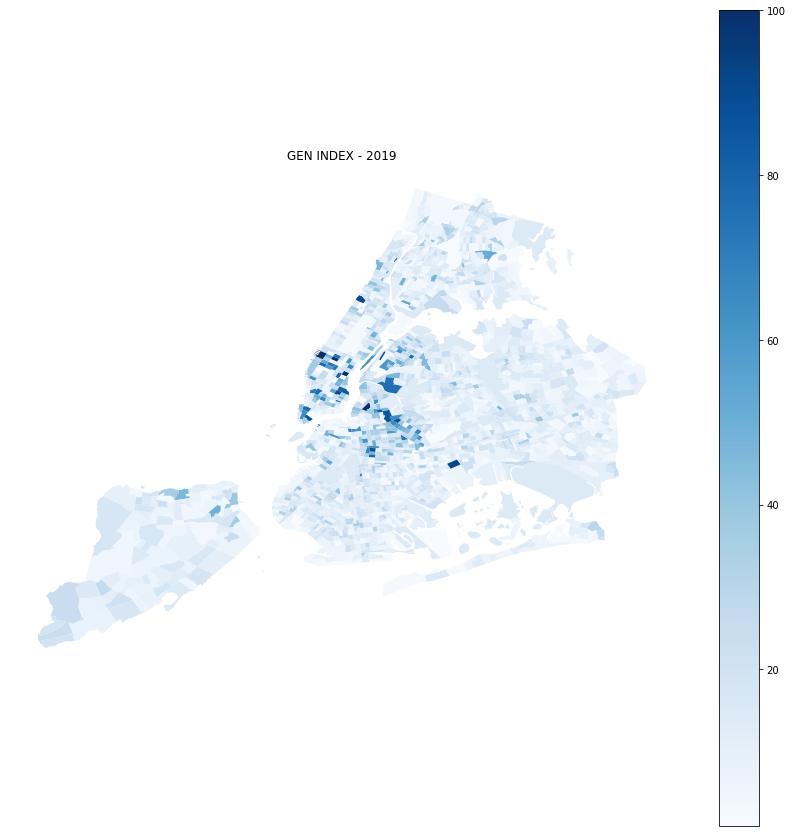

In [210]:
fig,ax = plt.subplots(figsize=(15,15))
gdf_2019.plot(column='gen_INDEX_v2',legend=True,ax=ax,cmap='Blues')
plt.title('GEN INDEX - 2019')
#ax.set_facecolor('#22262d')
ax.axis('Off')
plt.show()


In [211]:
county_pop_avg_list_2019 = []
for i in range(1,6):
    county_pop_avg_list_2019.append(gdf_2019[gdf_2019['boro_code'] == i]['Total_Population'].mean())

In [212]:
county_pop_thresh = []
for i in range(5):
    county_pop_thresh.append(math.ceil(county_pop_avg_list_2019[i])*0.05) #take 5% as threshold for each county

In [213]:
county_pop_thresh

[283.35, 211.3, 170.4, 171.25, 215.9]

In [214]:
M_tract = gdf_2019[gdf_2019['boro_code'].astype(int) == 1]
Bx_tract = gdf_2019[gdf_2019['boro_code'].astype(int) == 2]
B_tract = gdf_2019[gdf_2019['boro_code'].astype(int) == 3]
Q_tract = gdf_2019[gdf_2019['boro_code'].astype(int) == 4]
S_tract = gdf_2019[gdf_2019['boro_code'].astype(int) == 5]


In [215]:
ingore_tracts_M = (M_tract[M_tract['Total_Population'].astype(int) < county_pop_thresh[0]]['Census_Tract']).index
ingore_tracts_Bx = (Bx_tract[Bx_tract['Total_Population'].astype(int) < county_pop_thresh[1]]['Census_Tract']).index
ingore_tracts_B = (B_tract[B_tract['Total_Population'].astype(int) < county_pop_thresh[2]]['Census_Tract']).index
ingore_tracts_Q = (Q_tract[Q_tract['Total_Population'].astype(int) < county_pop_thresh[3]]['Census_Tract']).index
ingore_tracts_S = (S_tract[S_tract['Total_Population'].astype(int) < county_pop_thresh[4]]['Census_Tract']).index

ingore_tracts_M = np.asarray(ingore_tracts_M)
ingore_tracts_Bx = np.asarray(ingore_tracts_Bx)
ingore_tracts_B = np.asarray(ingore_tracts_B)
ingore_tracts_Q = np.asarray(ingore_tracts_Q)
ingore_tracts_S = np.asarray(ingore_tracts_S)

In [216]:
Ignore_tracts_index = np.concatenate((ingore_tracts_M,ingore_tracts_Bx,ingore_tracts_B,ingore_tracts_Q,ingore_tracts_S))

In [217]:
Ignore_tracts_index

array([   2,    4,  596, 1018, 1019, 1022, 1178, 1485, 1515, 1649, 1824,
       2093, 2149, 1173, 1211, 1372, 1401, 1406, 2047, 2051, 2052,  475,
        674,  986,  993, 1459, 1658, 1840, 2015, 2021, 2054, 2157,  501,
        678,  752,  792,  853,  981, 1036, 1063, 1071, 1134, 1414, 1562,
       1604, 1650, 1808, 1875, 1891, 1903, 1946, 1978, 1984, 2005, 2018,
       2023, 2029, 2049, 2155, 1999, 2038, 2136])

In [218]:
#setting gen score = 0 for above tracts
for i in range(len(Ignore_tracts_index)):
    gdf_2019['gen_INDEX_v2'].loc[Ignore_tracts_index[i]] = 0

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


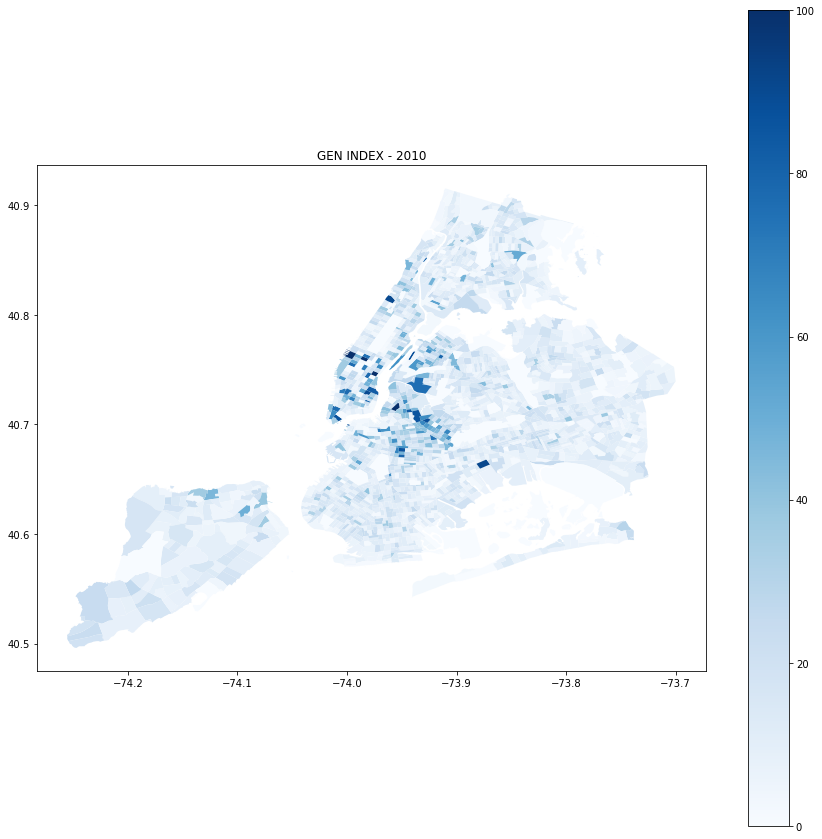

In [219]:
fig,ax = plt.subplots(figsize=(15,15))
gdf_2019.plot(column='gen_INDEX_v2',legend=True,ax=ax,cmap='Blues')
plt.title('GEN INDEX - 2010')
#ax.set_facecolor('#22262d')
plt.show()

In [220]:
temp = pd.DataFrame(gdf_2019)
temp.to_csv('FINAL_GEN_2019.csv')

In [221]:
gdf_2019.to_file("UD_2019_Final_map/gdf_2019_final.shp")

<ipython-input-221-e7eec4d576d8>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_2019.to_file("UD_2019_Final_map/gdf_2019_final.shp")
